In [1]:
exec (open("/Users/pvmarkov/dengue/scripts/functions2.py").read ())
refgenome_file = "/Users/pvmarkov/dengue/data/pDVWSK601-NGC virus.gb"
#getting_cover_ntfreqs ("/Users/pvmarkov/dengue/data/merged_twoway_kass_rehead_sorted.bam", "/Users/pvmarkov/dengue/data/mergetwoway_kass_cover_majorb_seqqual>=60ON_alignqualOFF_pairsOFF.csv", True, False, False)

In [2]:
# The first two lines load the usual diversity dataset but addding the number of indels by genome position
counts_dataframe_merged = pd.read_csv ("/Users/pvmarkov/dengue/data/indels_by_position_with_mergeddatakass_seqqualON_alignqualON_pairsOFF.csv")
counts_dataframe_separate = pd.read_csv ("/Users/pvmarkov/dengue/data/indels_by_position_with_nonmerged_two_way_data_2run_seqqualOFF_alignqualOFF_pairsOFF.csv")
# The remaining 4 rows below load the small datasets 'number of indels per read' and 'indels by length'
counts_dataframe_MERGE_indel_LENGTH = pd.read_csv ("/Users/pvmarkov/dengue/data/pilotdata_mergeddatakass_seqqualON30_alignqualON_pairsOFF_indels_lengths.csv")
counts_dataframe_MERGE_indel_NUMBER = pd.read_csv ("/Users/pvmarkov/dengue/data/pilotdata_mergeddatakass_seqqualON30_alignqualON_pairsOFF_indels_per_read.csv")
counts_dataframe_SEPAR_indel_LENGTH = pd.read_csv ("/Users/pvmarkov/dengue/data/pilotdata_nonmerged_two_way_data_seqqualON>=30_alignqualON_pairsOFF_indels_lengths.csv")
counts_dataframe_SEPAR_indel_NUMBER = pd.read_csv ("/Users/pvmarkov/dengue/data/pilotdata_nonmerged_two_way_data_seqqualON>=30_alignqualON_pairsOFF_indels_per_read.csv")

correction = - getting_position_correction (refgenome_file, ''.join(counts_dataframe_merged ['majorsequence']))
#print (correction)


16138


In [3]:
print (counts_dataframe_separate.describe ())
print (counts_dataframe_merged.describe ())

         Unnamed: 0             As             Cs             Gs  \
count  10718.000000   10718.000000   10718.000000   10718.000000   
mean    5358.500000   51289.940940   32373.200317   39295.475182   
std     3094.164427   75382.246095   65000.408954   69408.922030   
min        0.000000       0.000000       0.000000       0.000000   
25%     2679.250000     195.000000     121.000000      75.000000   
50%     5358.500000     534.000000     343.000000     135.000000   
75%     8037.750000  134751.250000     755.000000   68485.750000   
max    10717.000000  272437.000000  273597.000000  269730.000000   

                 Ns             Ts       coverage  expected_number_of_errors  \
count  10718.000000   10718.000000   10718.000000               10718.000000   
mean       0.000187   32347.834484  155306.451110                 280.118646   
std        0.013660   64597.815961   35919.825944                 130.630345   
min        0.000000       0.000000       1.000000                  

In [4]:
import sys
annotations = '/Users/pvmarkov/dengue/data/ref_geno_anottation_relabel.gff'

try:
    f= open (annotations, 'r')
except IOError:
    print ("Unknown file " + annotations)
    sys.exit()
    
line = ""
annots_list = list ()
line_list = list ()
for l in f:
    if ('CDS' in l or 'UTR' in l) and 'DEN2' not in l and 'Beta-lactamase' not in l:
        line_list = l.split()
        annots_list.append (make_annotation (line_list [12], line_list [3], line_list [4], correction))
#        print (l)
#        print (line_list)
annots_list.sort (key=lambda x: x.start)
print ('The annotations and their positions are: \n',annots_list)
#print (annots_list [0].name)
#print (annots_list [0].start)
            

f.close()

The annotations and their positions are: 
 [5UTR: 0 to 95, "Capsid": 96 to 437, "SP\prM": 396 to 437, "prM": 438 to 935, "M\(mature\form)": 711 to 935, E: 936 to 2420, "NS1": 2421 to 3476, "NS2A": 3477 to 4130, "NS2B": 4131 to 4520, "NS3": 4521 to 6374, "NS4A": 6375 to 6824, "NS4B": 6825 to 7568, "NS5": 7569 to 10271, 3UTR: 10272 to 10722]


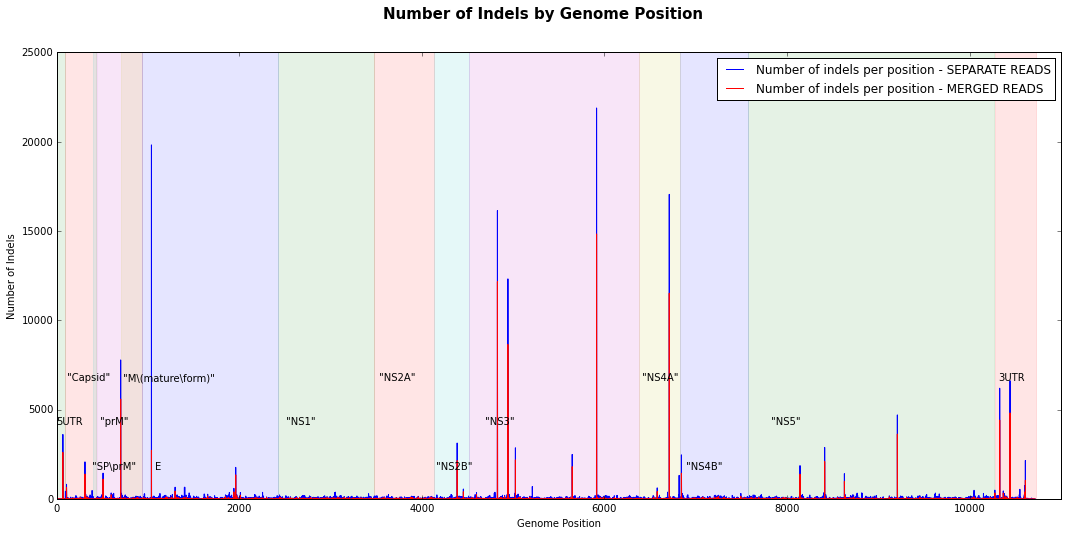

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.suptitle('Number of Indels by Genome Position', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe_separate ['position'], counts_dataframe_separate ['number_of_indels_by_position'], 'b-') #(position, coverage, 'r-')
plt.plot (counts_dataframe_merged ['position'], counts_dataframe_merged ['number_of_indels_by_position'], 'r-') #(position, coverage, 'r-')
plt.xlabel ('Genome Position')
plt.ylabel ('Number of Indels')
fig_size = rcParams["figure.figsize"]
plt.legend (['Number of indels per position - SEPARATE READS', 'Number of indels per position - MERGED READS'], loc = 'upper right')
axis_lower_limit = 0
axis_upper_limit = 25000
plt.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_upper_limit/15 + ((axis_upper_limit/10) *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

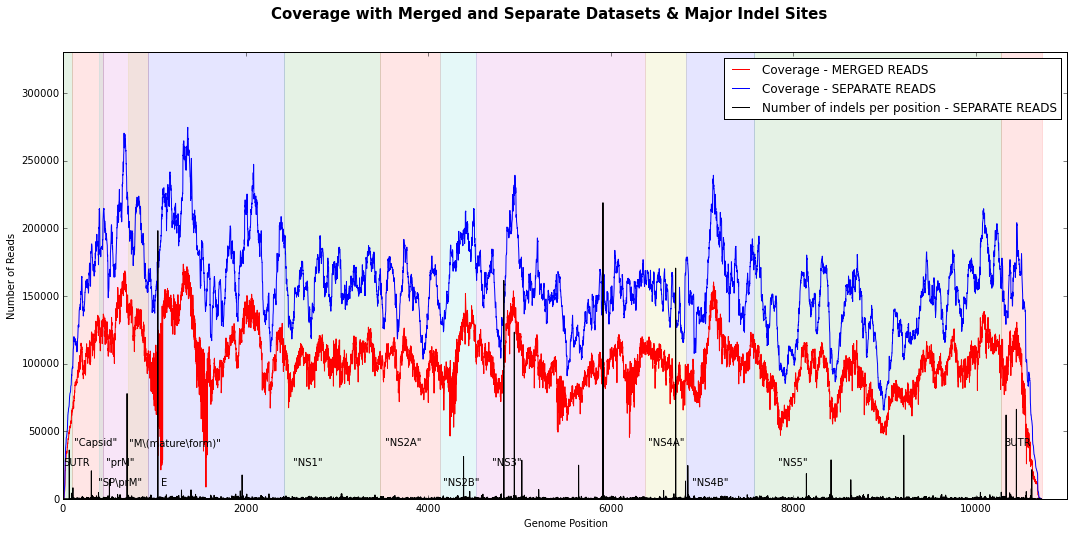

In [6]:
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.suptitle('Coverage with Merged and Separate Datasets & Major Indel Sites', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe_merged ['position'], counts_dataframe_merged ['coverage'], 'r-') #(position, coverage, 'r-')
plt.plot (counts_dataframe_separate ['position'], counts_dataframe_separate ['coverage'], 'b-') #(position, coverage, 'r-')
plt.plot (counts_dataframe_separate ['position'], 10*counts_dataframe_separate ['number_of_indels_by_position'], 'k-')
plt.xlabel ('Genome Position')
plt.ylabel ('Number of Reads')
fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
plt.legend (['Coverage - MERGED READS', 'Coverage - SEPARATE READS', 'Number of indels per position - SEPARATE READS'], loc = 'upper right')
axis_lower_limit = 0
axis_upper_limit = 330000
plt.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

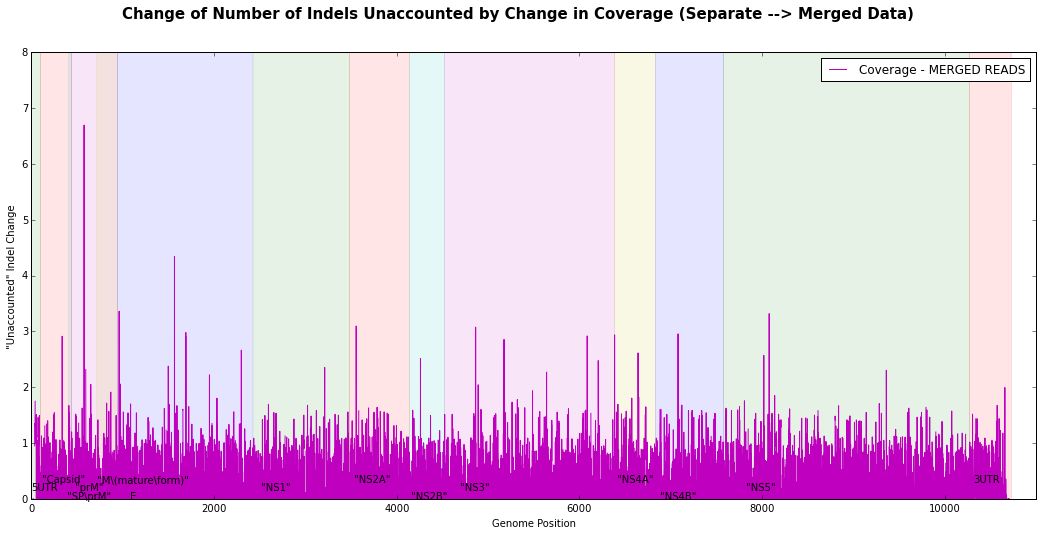

In [7]:
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
lesser_sites_number = min(len(counts_dataframe_merged ['position']), len(counts_dataframe_separate ['position']))
range_of_sites = list (range (0, lesser_sites_number))
plt.suptitle('Change of Number of Indels Unaccounted by Change in Coverage (Separate --> Merged Data)', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe_merged ['position'][range_of_sites], (counts_dataframe_merged ['number_of_indels_by_position'][range_of_sites]/counts_dataframe_separate ['number_of_indels_by_position'][range_of_sites])/ (counts_dataframe_merged ['coverage'][range_of_sites]/counts_dataframe_separate ['coverage'][range_of_sites]), 'm-')
plt.xlabel ('Genome Position')
plt.ylabel ('"Unaccounted" Indel Change')
fig_size = rcParams["figure.figsize"]
plt.legend (['Coverage - MERGED READS', 'Coverage - SEPARATE READS', 'Number of indels per position - SEPARATE READS'], loc = 'upper right')
axis_lower_limit = 0
axis_upper_limit = 8
plt.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), (0.15 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

This figure shows a 'ratio of ratios'. Specifically it compares (by genome position) two ratios. The first is the ratio of number of indels in the merged reads data to number of indels in the separate reads data. The second is the ratio of coverage in merged reads data over coverage in separate reads data. So in essence the graph show the ammount of decrease of number of indels when we go from separate to merged reads, that could not be accounted for by the decrease of coverage resulting from this data change. Peaks represent positions with indels not susceptible to coverage changes. A problem with presenting the data in this way is that it may highlight sites, where the actual number of indels is very small, which would not be of priority interest to us. The next figure figure is a way to correct for this.

[0, 15000, 0, 3.5]

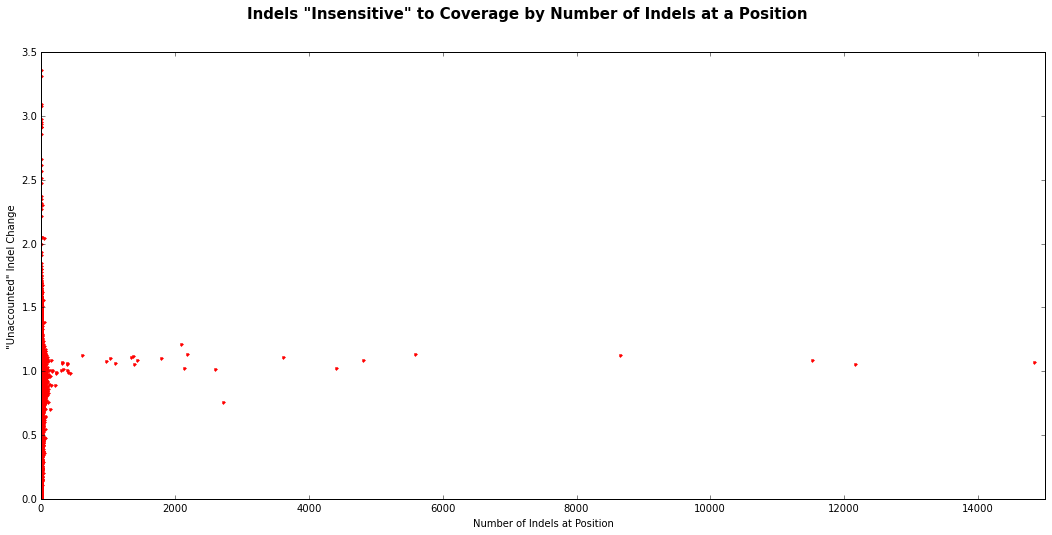

In [8]:
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.suptitle('Indels "Insensitive" to Coverage by Number of Indels at a Position ', fontsize=15, fontweight='bold')
#plt.plot (counts_dataframe_merged ['position'][range_of_sites], counts_dataframe_merged ['coverage'][range_of_sites]/counts_dataframe_separate ['coverage'][range_of_sites], 'r-') #(position, coverage, 'r-')
#plt.plot (counts_dataframe_merged ['position'][range_of_sites], counts_dataframe_merged ['number_of_indels_by_position'][range_of_sites]/counts_dataframe_separate ['number_of_indels_by_position'][range_of_sites], 'b.')
plt.plot (counts_dataframe_merged ['number_of_indels_by_position'][range_of_sites], (counts_dataframe_merged ['number_of_indels_by_position'][range_of_sites]/counts_dataframe_separate ['number_of_indels_by_position'][range_of_sites])/ (counts_dataframe_merged ['coverage'][range_of_sites]/counts_dataframe_separate ['coverage'][range_of_sites]), 'r.')
plt.xlabel ('Number of Indels at Position')
plt.ylabel ('"Unaccounted" Indel Change')
axis_lower_limit = 0
axis_upper_limit = 3.5
plt.axis ([0, 15000, axis_lower_limit, axis_upper_limit])

The figure above shows the relationship of "unaccounted" indel number change and the number of indels per site. It shows that all of the visible high peaks from previous figure are in sites with small number of indels and also highlights this value for sites that feature larger number of indels. The value for most of these sites is a bit over 1 on the y axis, suggesting that the decrease in indels numbers reflects simply decrease of coverage and is not influenced by sequencing quality. 

The conclusion is that the large numbers of indels, which we observe at some positions do not seem to be a result of poor sequencing quality at these sites.


*There is one peculiar individual data point (dot at y~=0.8), where decrease of coverage seems to be associated with increased number of indels.

/Users/pvmarkov/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/pvmarkov/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:36: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


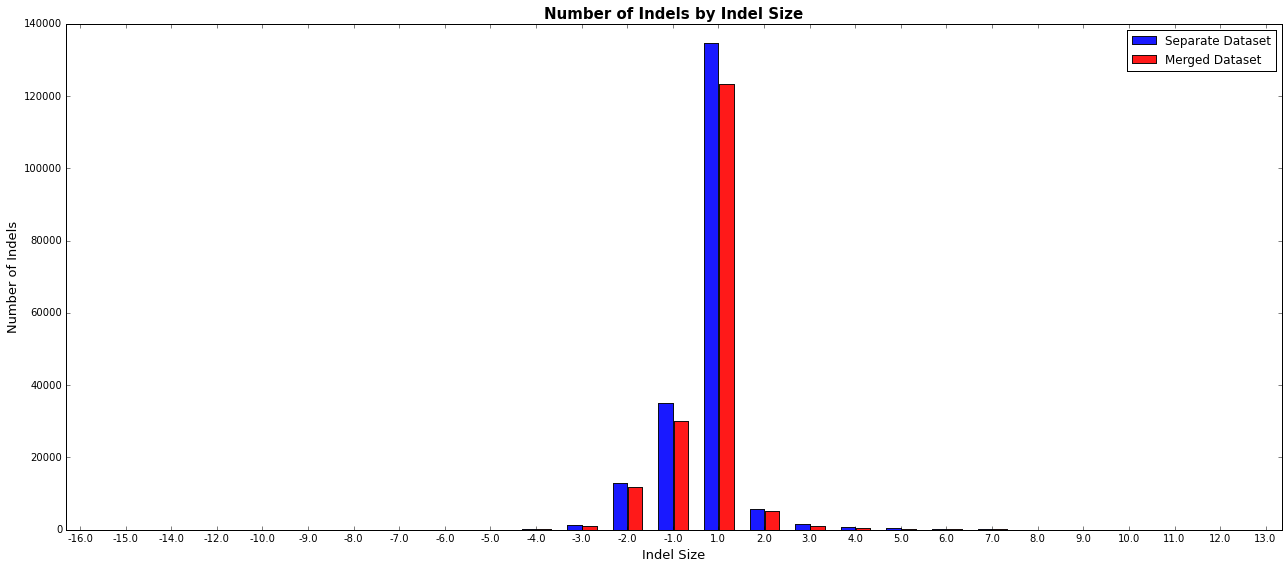

In [34]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

#counts_dataframe_MERGE_indel_LENGTH.sort(columns='indel_size', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')
#counts_dataframe_SEPAR_indel_LENGTH.sort(columns='indel_size', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

indel_lengths_dataframe = pd.merge(counts_dataframe_SEPAR_indel_LENGTH, counts_dataframe_MERGE_indel_LENGTH, how='outer', on=['indel_size', 'indel_size'])

#print (indel_lengths_dataframe)

indel_lengths_dataframe.sort(columns='indel_size', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

n_groups = len (indel_lengths_dataframe ['indel_size'])
#print (n_groups)

fig, ax = plt.subplots()
index = np.arange(n_groups) # the x locations for the groups
bar_width = 0.95 # the width of the bars
opacity = 0.9

rects1 = plt.bar(3*index, indel_lengths_dataframe ['number_of_indels_by_size_x'], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Separate Dataset')

rects1 = plt.bar(3*index+1, indel_lengths_dataframe ['number_of_indels_by_size_y'], bar_width,
                 alpha=opacity,
                 color='r',
                 label='Merged Dataset')

sizes_list = counts_dataframe_MERGE_indel_LENGTH ['indel_size']
#print (sizes_list)

axis = indel_lengths_dataframe ['indel_size'].copy()
axis.sort()
#print (axis)
for e in range(len(axis)):
    axis[e] = str(axis[e])
#print (type(axis))

plt.xlabel('Indel Size', fontsize=13)
plt.ylabel('Number of Indels', fontsize=13)
plt.title('Number of Indels by Indel Size', fontsize=15, fontweight='bold')
plt.xticks(3*index + bar_width, list (axis))
plt.legend()


#plt.suptitle('Coverage with Merged and Separate Datasets & Major Indel Sites', fontsize=15, fontweight='bold')

#plt.yscale('log')

plt.tight_layout()
plt.show()


The figure above shows the number of indels classified according to the size of each indel and depending on the data source. On the x axis are the different indel sizes encountered and on the y axis are their numbers. Sizes (on x axis) are positive or negative. Positive sizes denote insertions, negative numbers denote deletions. Bars are in pairs, showing for each indel length the nuber according to the original pair dataset (blue) and according to the newer merged pairs dataset (red).

The largest number of all are single nucleotide insertions, followed by a single nucleotide deletions and two-nucleotide insertions. In general the larger the length of indels, the less frequent they are.

Looking at the paired data (blue bars), after the initial big drop, the number of insertions (positive numbers) decrease much slowlier with size than is the case for the number of deletions (negative numbers). The merged data (red) seem to show somewhat opposite pattern.

/Users/pvmarkov/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/pvmarkov/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:39: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


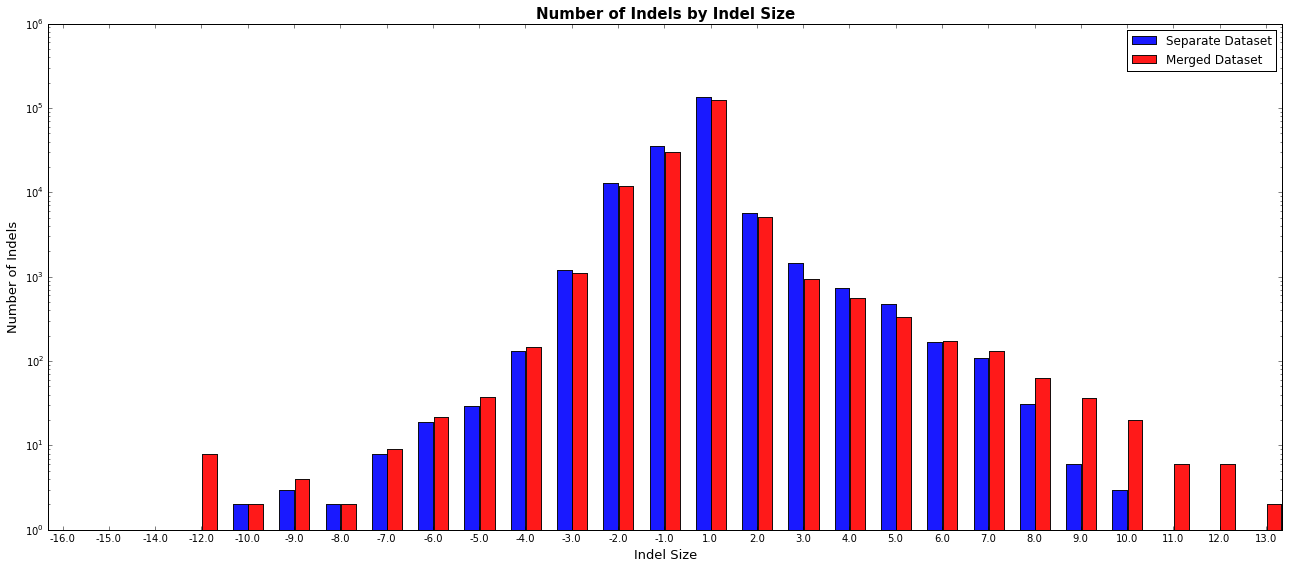

In [31]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

#counts_dataframe_MERGE_indel_LENGTH.sort(columns='indel_size', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')
#counts_dataframe_SEPAR_indel_LENGTH.sort(columns='indel_size', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

# BELOW: MERGING TWO DATAFRAMES USING INFO FROM: http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging
indel_lengths_dataframe = pd.merge(counts_dataframe_SEPAR_indel_LENGTH, counts_dataframe_MERGE_indel_LENGTH, how='outer', on=['indel_size', 'indel_size'])

#print(indel_lengths_dataframe)

indel_lengths_dataframe.sort(columns='indel_size', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

#print(indel_lengths_dataframe)

n_groups = len (indel_lengths_dataframe ['indel_size'])
#print (n_groups)

fig, ax = plt.subplots()
index = np.arange(n_groups) # the x locations for the groups
bar_width = 0.95 # the width of the bars
opacity = 0.9

rects1 = plt.bar(3*index, indel_lengths_dataframe ['number_of_indels_by_size_x'], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Separate Dataset')

rects1 = plt.bar(3*index+1, indel_lengths_dataframe ['number_of_indels_by_size_y'], bar_width,
                 alpha=opacity,
                 color='r',
                 label='Merged Dataset')

#sizes_list = counts_dataframe_MERGE_indel_LENGTH ['indel_size']
#print (sizes_list)

axis = indel_lengths_dataframe ['indel_size'].copy()
axis.sort()
#print (axis)
for e in range(len(axis)):
    axis[e] = str(axis[e])
#print (type(axis))
    
plt.xlabel('Indel Size', fontsize=13)
plt.ylabel('Number of Indels', fontsize=13)
plt.title('Number of Indels by Indel Size', fontsize=15, fontweight='bold')
plt.xticks(3*index + bar_width, list (axis))
plt.legend()

plt.yscale('log')

plt.tight_layout()
plt.show()

The figure above shows the same relationship as the previous figure (number of indels classified according to the size of each indel and depending on the data source), but the number of indel on the y axis are shown on a logarithmic scale. This way of presenting the data alows inspection of relative small values (e.g. the deletions at the left end) alongsides extremely high values (the short insertions and deletions in the centre).

This figure confirms the message from the previous one, that the merging of data has affected disproportionately more the number of insertions than the number of deletions.

In general there does not seem to be substantially hugher number of indel that are multiples of three (indels that would not disrupt the reading frame in coding sequences). Looking at the separate reads data (blue) deletions of size 9, 12 and 15 are a bit more numerous than their neighbours, but these are very small numbers. Insertions of size 9 on the other hand are roughly about 3 times more than either insertions with size 8 or insertions with size 10 (see also previous figure). Most of these seem to disappear after reads are merged (red).

It might be interesting to see if excluding the UTRs might change these or other values, even by a little.

/Users/pvmarkov/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/pvmarkov/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


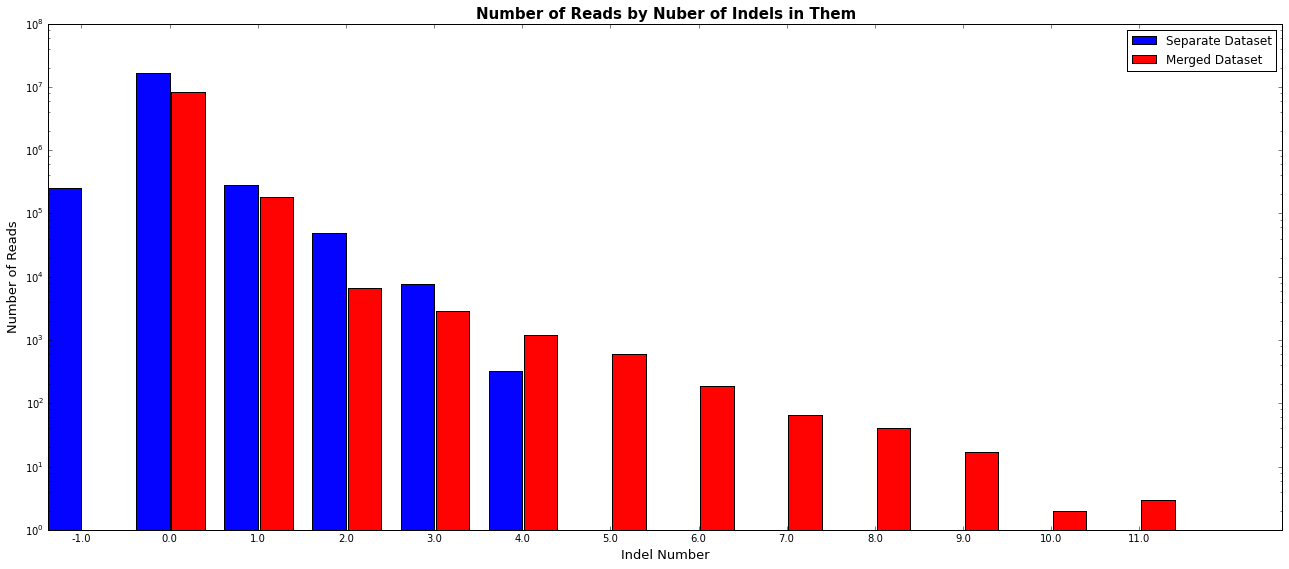

In [11]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

counts_dataframe_MERGE_indel_NUMBER.sort(columns='number_of_indels_per_read', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')
counts_dataframe_SEPAR_indel_NUMBER.sort(columns='number_of_indels_per_read', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

# BELOW: MERGING TWO DATAFRAMES USING INFO FROM: http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging
indel_numbs_dataframe = pd.merge(counts_dataframe_SEPAR_indel_NUMBER, counts_dataframe_MERGE_indel_NUMBER,  how='outer', on=['number_of_indels_per_read', 'number_of_indels_per_read'])

#print (indel_numbs_dataframe)

n_groups = len (indel_numbs_dataframe ['number_of_indels_per_read'])
#print (n_groups)

fig, ax = plt.subplots()
index = 2.5 *np.arange(n_groups) # the x locations for the groups
bar_width = 0.95 # the width of the bars
opacity = 0.99

# BLACK&WHITE COLUMN FILL patterns, using e.g. hatch="/" ('/', '-', '+', 'x', '\\', '*', 'o', 'O', '.') http://matplotlib.org/examples/pylab_examples/hatch_demo.html

rects1 = plt.bar(index, indel_numbs_dataframe ['number_of_reads_with_given_indel_number_x'], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Separate Dataset')

rects1 = plt.bar(index+1, indel_numbs_dataframe ['number_of_reads_with_given_indel_number_y'], bar_width,
                 alpha=0.99,
                 color='r',
                 label='Merged Dataset')

plt.xlabel('Indel Number', fontsize=13)
plt.ylabel('Number of Reads', fontsize=13)
plt.title('Number of Reads by Nuber of Indels in Them', fontsize=15, fontweight='bold')
plt.xticks(index + bar_width, (indel_numbs_dataframe ['number_of_indels_per_read']))
plt.legend()

plt.yscale('log')

plt.tight_layout()
plt.show()

This figure shows the number reads with different numbers of indels found in them. As before blue and red bars reflect the data from the two different alignments (separate or merged pairs). The y axis is again to a logarithmic scale.

The figure above shows that the number of reads with indels in them has roughly halved (for the scale of the change see the next linear scale figure), a change probably reflecting the decrease roughly in half in the number of reads in the dataset.

The figure suggests that the merging of the read pairs, has reduced the numbers of reads in each of the categories, containing from 1 to 4 indels per read. It has also increased the number of reads in categories with 5 or more indels in them, although the absolute number of reads in these categories is very small compared to reads containing 1, 2 or 3 indels (see also following figure). The number of reads without indels have changed from ~250,000 to zero. This overall shift towards more indels per read makes senese in that reads are longer after the merge and combine a pair of previous reads, sometimes combining in the same read different indel positions.



/Users/pvmarkov/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/pvmarkov/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


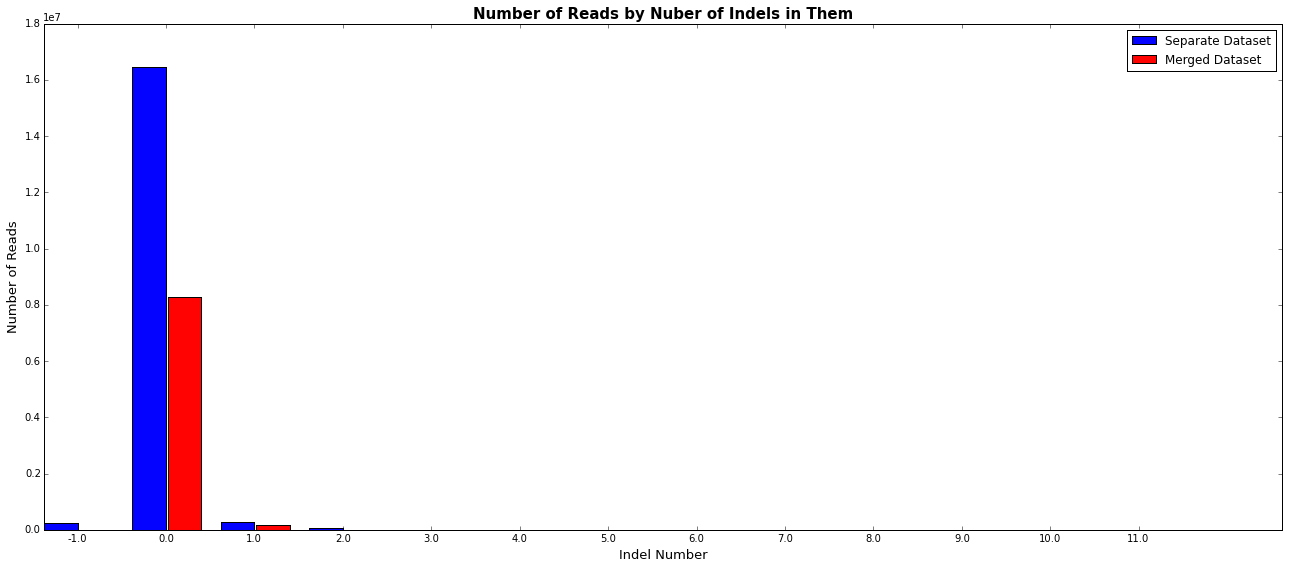

In [12]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

counts_dataframe_MERGE_indel_NUMBER.sort(columns='number_of_indels_per_read', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')
counts_dataframe_SEPAR_indel_NUMBER.sort(columns='number_of_indels_per_read', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

# BELOW: MERGING TWO DATAFRAMES USING INFO FROM: http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging
indel_numbs_dataframe = pd.merge(counts_dataframe_SEPAR_indel_NUMBER, counts_dataframe_MERGE_indel_NUMBER,  how='outer', on=['number_of_indels_per_read', 'number_of_indels_per_read'])

#print (indel_numbs_dataframe)

n_groups = len (indel_numbs_dataframe ['number_of_indels_per_read'])
#print (n_groups)

fig, ax = plt.subplots()
index = 2.5 *np.arange(n_groups) # the x locations for the groups
bar_width = 0.95 # the width of the bars
opacity = 0.99

# BLACK&WHITE COLUMN FILL patterns, using e.g. hatch="/" ('/', '-', '+', 'x', '\\', '*', 'o', 'O', '.') http://matplotlib.org/examples/pylab_examples/hatch_demo.html

rects1 = plt.bar(index, indel_numbs_dataframe ['number_of_reads_with_given_indel_number_x'], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Separate Dataset')

rects1 = plt.bar(index+1, indel_numbs_dataframe ['number_of_reads_with_given_indel_number_y'], bar_width,
                 alpha=0.99,
                 color='r',
                 label='Merged Dataset')

plt.xlabel('Indel Number', fontsize=13)
plt.ylabel('Number of Reads', fontsize=13)
plt.title('Number of Reads by Nuber of Indels in Them', fontsize=15, fontweight='bold')
plt.xticks(index + bar_width, (indel_numbs_dataframe ['number_of_indels_per_read']))
plt.legend()

#plt.yscale('log')

plt.tight_layout()
plt.show()

This figure shows the number reads with different numbers of indels found in them. The y axis is set to a normal linear scale (in 10s of millions, so 1.6 = 16 milion, 0.2 = 2 milion).

In [13]:
max(counts_dataframe_merged ['number_of_indels_by_position'])
pos = range(counts_dataframe_merged ['number_of_indels_by_position'].argmax()-10,counts_dataframe_merged ['number_of_indels_by_position'].argmax()+10)
for i in pos:
    print (counts_dataframe_merged ['majorsequence'][i])

    
pos2 = counts_dataframe_merged['position'] [(counts_dataframe_merged['number_of_indels_by_position'] > 1000)]   
print(pos2)
for j in pos2:
    pos = range (j-5, j+10)
    for i in pos:
        if i == j:
            print ("-------")
        print (counts_dataframe_merged ['majorsequence'][i])
    print ("#######")
#print(counts_dataframe ['majorsequence'][counts_dataframe['number_of_indels_by_position'] > 1000])

g
g
a
a
g
a
a
a
t
c
c
a
a
a
a
a
a
t
g
a
69          69
311        311
509        509
702        702
1039      1039
1962      1962
4387      4387
4828      4828
4943      4943
5025      5025
5647      5647
5914      5914
6710      6710
6843      6843
8142      8142
8412      8412
9208      9208
10329    10329
10442    10442
10610    10610
Name: position, dtype: int64
t
a
a
c
a
-------
g
t
t
t
t
t
t
a
a
t
#######
a
c
a
a
t
-------
t
a
a
a
a
a
a
t
c
a
#######
c
t
t
c
t
-------
g
t
t
t
a
a
a
a
c
a
#######
g
a
a
g
a
-------
g
a
a
a
a
a
a
g
a
t
#######
g
a
t
g
g
-------
c
a
a
a
a
a
a
c
a
a
#######
a
t
t
t
g
-------
g
a
a
a
a
a
a
g
a
c
#######
g
t
c
g
a
-------
t
a
a
a
a
a
a
c
g
a
#######
g
c
c
t
g
-------
g
a
a
a
a
a
a
t
c
c
#######
a
t
c
g
a
-------
c
a
a
a
a
a
a
g
g
a
#######
a
g
a
c
t
-------
g
a
a
a
a
a
a
g
t
a
#######
c
c
t
g
a
-------
g
a
a
a
a
a
a
t
g
g
#######
a
a
a
t
c
-------
c
a
a
a
a
a
a
t
g
a
#######
c
t
g
g
a
-------
g
t
t
t
t
t
t
c
t
c
#######
t
c
c
t
g
-------
g
a
a
a
a
a
a
c

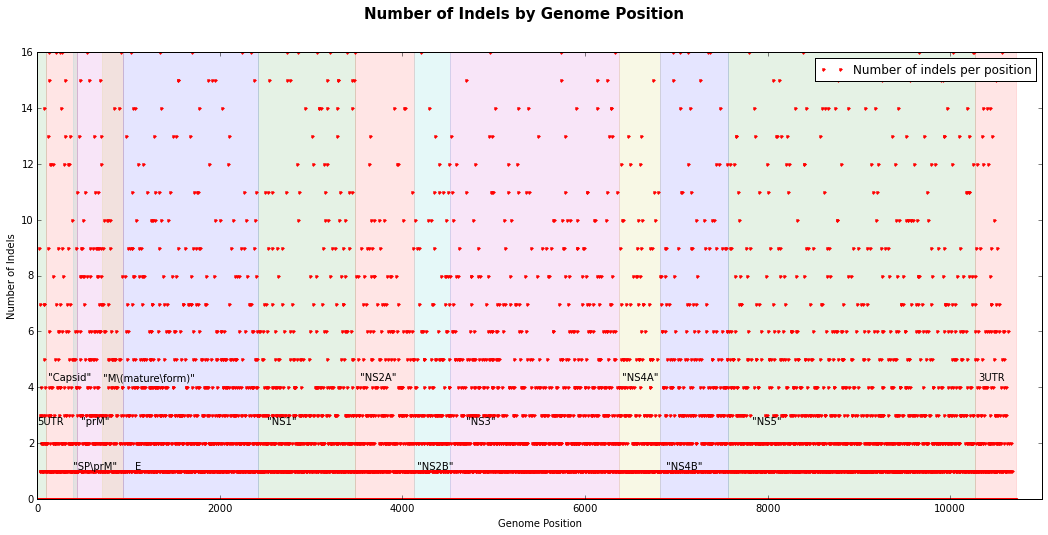

In [14]:
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.suptitle('Number of Indels by Genome Position', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe_merged ['position'], counts_dataframe_merged ['number_of_indels_by_position'], 'r.') #(position, coverage, 'r-')
plt.xlabel ('Genome Position')
plt.ylabel ('Number of Indels')
fig_size = rcParams["figure.figsize"]
plt.legend (['Number of indels per position'], loc = 'upper right')
axis_lower_limit = 0
axis_upper_limit = 16
plt.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_upper_limit/15 + ((axis_upper_limit/10) *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

In [15]:
lict = [1, 2, 3, 3]
print (len (lict))

4
